# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

## PROBLEM STATEMENT

- Images of traffic signs are there in the dataset and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


## Basic Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

## IMAGE EXTRAPOLATION

31

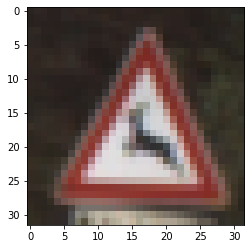

In [6]:
i = 500
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

1

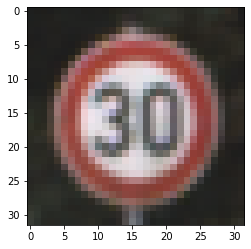

In [7]:
i = 500
plt.imshow(X_validation[i]) # Show images are not shuffled
y_validation[i]

22

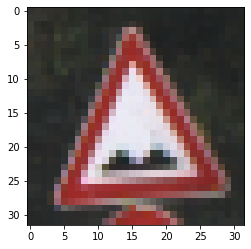

In [8]:
i = 500
plt.imshow(X_test[i]) # Show images are not shuffled
y_test[i]

## DATA PREPARATION

In [9]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [10]:
X_train

array([[[[ 18,  17,  19],
         [ 18,  18,  21],
         [ 16,  17,  19],
         ...,
         [ 13,  14,  16],
         [ 14,  15,  16],
         [ 15,  16,  17]],

        [[ 17,  18,  20],
         [ 18,  18,  21],
         [ 16,  16,  19],
         ...,
         [ 16,  16,  18],
         [ 17,  17,  17],
         [ 16,  17,  17]],

        [[ 19,  20,  22],
         [ 18,  18,  21],
         [ 17,  16,  18],
         ...,
         [ 17,  16,  18],
         [ 18,  18,  19],
         [ 17,  18,  19]],

        ...,

        [[ 18,  15,  18],
         [ 18,  16,  19],
         [ 18,  15,  17],
         ...,
         [ 14,  12,  14],
         [ 14,  13,  15],
         [ 13,  12,  14]],

        [[ 19,  17,  20],
         [ 20,  18,  21],
         [ 19,  16,  18],
         ...,
         [ 15,  13,  15],
         [ 16,  15,  17],
         [ 13,  13,  15]],

        [[ 22,  21,  23],
         [ 19,  18,  23],
         [ 18,  17,  20],
         ...,
         [ 16,  15,  17],
        

In [11]:
X_train.shape

(34799, 32, 32, 3)

In [12]:
# reducing images size from 3 dimensional to 1 dimension i.e coloured to gray img

X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [13]:
X_train_gray.shape

(34799, 32, 32, 1)

In [14]:
X_test_gray.shape

(12630, 32, 32, 1)

In [15]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [16]:
#performing normalization

X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [17]:
X_train_gray_norm

array([[[[-0.859375  ],
         [-0.8515625 ],
         [-0.86458333],
         ...,
         [-0.88802083],
         [-0.8828125 ],
         [-0.875     ]],

        [[-0.85677083],
         [-0.8515625 ],
         [-0.8671875 ],
         ...,
         [-0.86979167],
         [-0.8671875 ],
         [-0.86979167]],

        [[-0.84114583],
         [-0.8515625 ],
         [-0.8671875 ],
         ...,
         [-0.8671875 ],
         [-0.85677083],
         [-0.859375  ]],

        ...,

        [[-0.8671875 ],
         [-0.86197917],
         [-0.86979167],
         ...,
         [-0.89583333],
         [-0.890625  ],
         [-0.8984375 ]],

        [[-0.85416667],
         [-0.84635417],
         [-0.86197917],
         ...,
         [-0.88802083],
         [-0.875     ],
         [-0.89322917]],

        [[-0.828125  ],
         [-0.84375   ],
         [-0.85677083],
         ...,
         [-0.875     ],
         [-0.8828125 ],
         [-0.88541667]]],


       [[[-0.83333333],


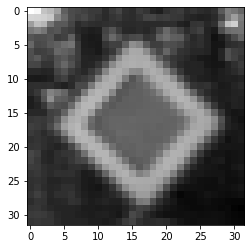

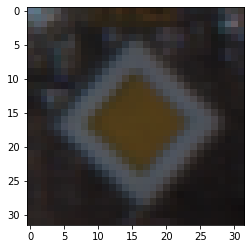

In [19]:
#visual comparison of gray and coloured images

i = 600
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

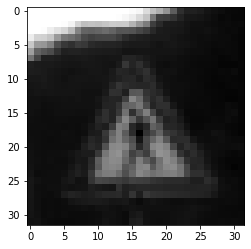

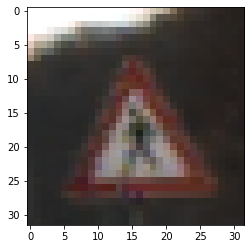

In [20]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])

## MODEL TRAINING

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
image_shape = X_train_gray[i].shape

In [23]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [24]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [25]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 9s 120ms/step - loss: 3.1596 - accuracy: 0.1789 - val_loss: 2.6913 - val_accuracy: 0.2980
Epoch 2/50
70/70 [==============================] - 8s 112ms/step - loss: 1.6365 - accuracy: 0.5413 - val_loss: 1.4484 - val_accuracy: 0.5859
Epoch 3/50
70/70 [==============================] - 8s 116ms/step - loss: 0.9086 - accuracy: 0.7409 - val_loss: 1.0235 - val_accuracy: 0.7107
Epoch 4/50
70/70 [==============================] - 10s 147ms/step - loss: 0.6348 - accuracy: 0.8283 - val_loss: 0.9066 - val_accuracy: 0.7454
Epoch 5/50
70/70 [==============================] - 11s 151ms/step - loss: 0.5074 - accuracy: 0.8647 - val_loss: 0.7672 - val_accuracy: 0.7864
Epoch 6/50
70/70 [==============================] - 10s 148ms/step - loss: 0.4257 - accuracy: 0.8891 - val_loss: 0.7157 - val_accuracy: 0.8093
Epoch 7/50
70/70 [==============================] - 10s 147ms/step - loss: 0.3714 - accuracy: 0.9044 - val_loss: 0.6787 - val_accuracy: 0.8224
Ep

## MODEL EVALUATION

In [28]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8777


# history.history.keys()

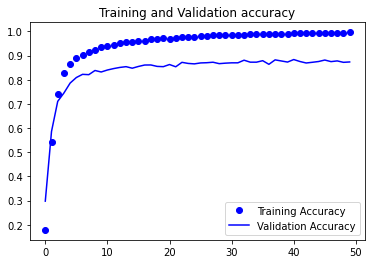

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

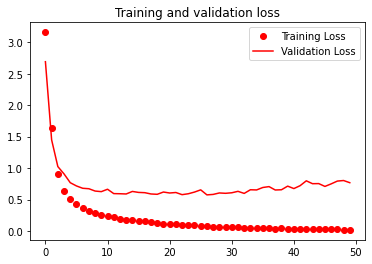

In [30]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
#get the predictions for the test data
predicted_classes = cnn_model.predict(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

395/395 [==============================] - 2s 5ms/step


In [32]:
y_true

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [33]:
y_true.shape

(12630,)

In [34]:
predicted_classes

array([[0.0000000e+00, 5.3147824e-34, 0.0000000e+00, ..., 5.7222734e-14,
        6.8177462e-15, 1.5388437e-28],
       [1.9738515e-08, 1.0000000e+00, 1.4856050e-12, ..., 2.7295463e-22,
        1.8191060e-33, 1.4806595e-28],
       [0.0000000e+00, 5.8456258e-30, 1.0214263e-34, ..., 1.0250366e-27,
        1.3299536e-24, 1.1165175e-37],
       ...,
       [4.6418836e-06, 3.7511209e-01, 1.1780955e-05, ..., 7.9470382e-11,
        1.6240789e-04, 4.2857403e-07],
       [8.0453211e-13, 2.2651504e-03, 1.2023677e-03, ..., 2.0788941e-06,
        2.3536520e-10, 2.9036340e-07],
       [8.7449790e-13, 4.0346936e-08, 5.5652254e-05, ..., 1.0514252e-08,
        2.3758120e-20, 3.8907357e-21]], dtype=float32)

In [35]:
predicted_classes.shape

(12630, 43)

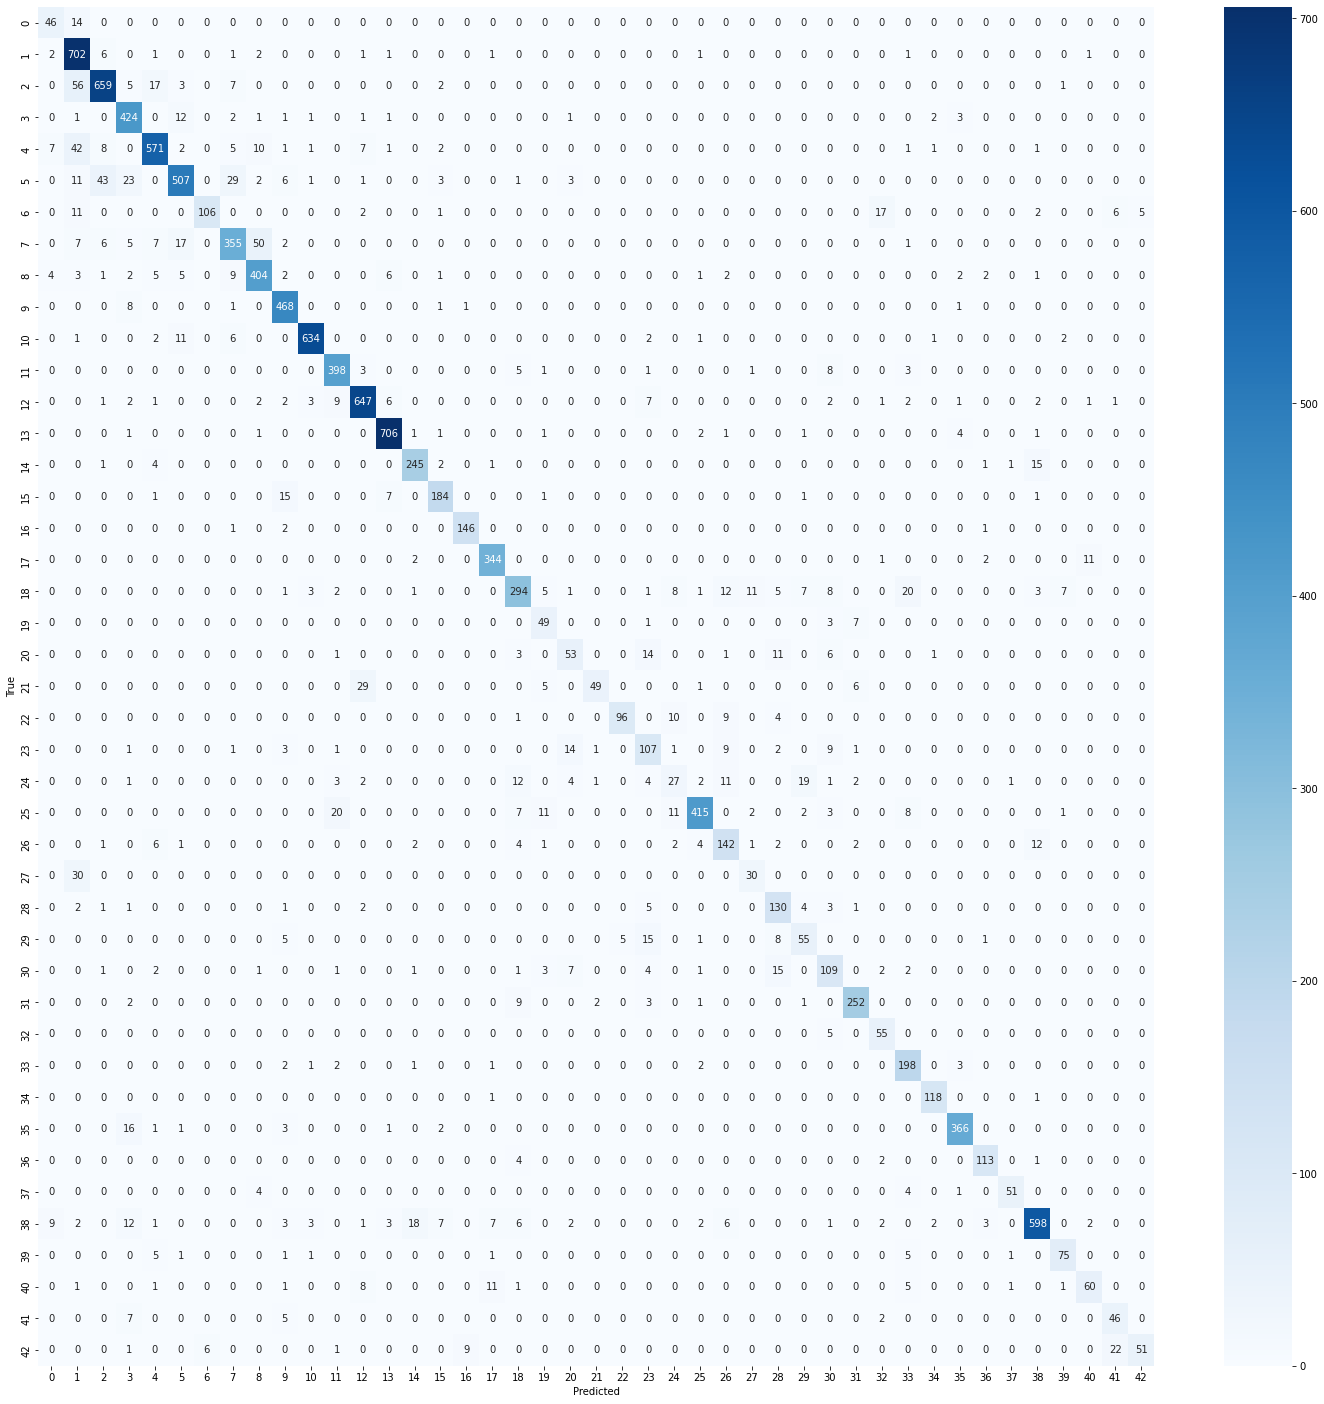

In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predicted_classes from probabilities to class labels
predicted_classes = np.argmax(predicted_classes, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, predicted_classes)

# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

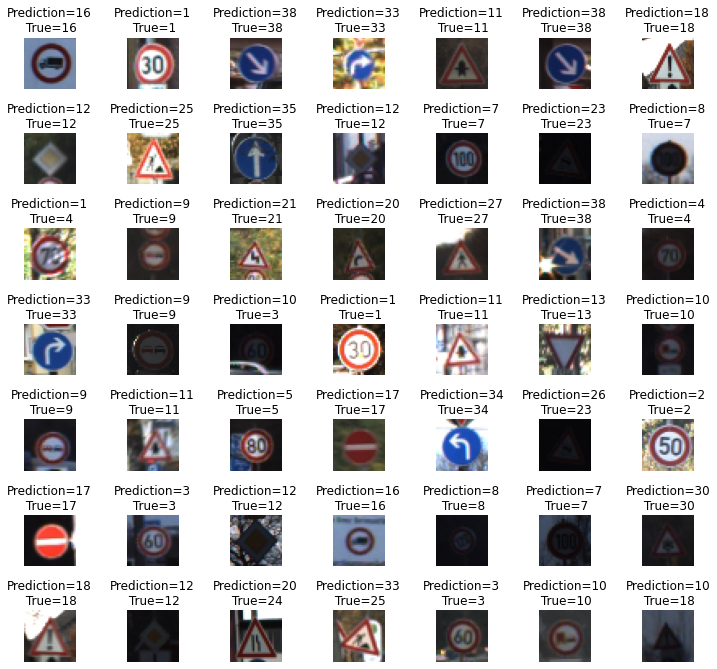

In [40]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)